#Iris data classification

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('/kaggle/input/iris-dataset/iris.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/iris-dataset/iris.csv'

In [3]:
print(df.head())

NameError: name 'df' is not defined

In [ ]:
print(df.shape)

(150, 5)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#data preprocessing

In [ ]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
y=df['species']
X=df.drop('species',axis=1)

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#KNN application

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#confusion matrics
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]


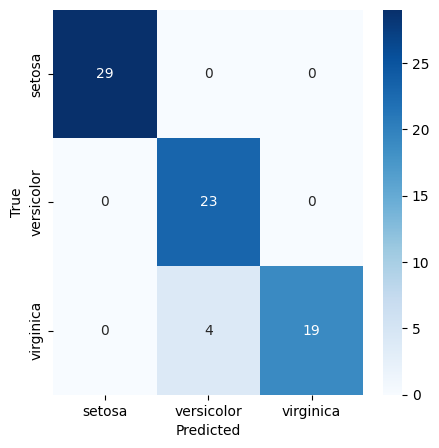

In [ ]:
target_names = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
y_pred = knn.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.95


##logistic regration application

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#confusion matrics
y_pred = logreg.predict(X_test)
cm_Log = metrics.confusion_matrix(y_test, y_pred)
print(cm_Log)

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]


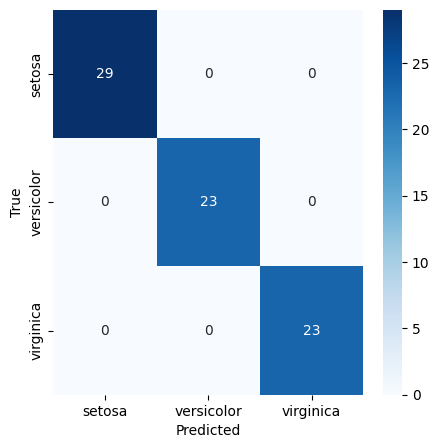

In [ ]:
target_names = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize=(5, 5))
sns.heatmap(cm_Log, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
y_pred_logreg = logreg.predict(X_test)
print(f"Accuracy (Logistic Regression): {metrics.accuracy_score(y_test, y_pred_logreg):.2f}")

Accuracy (Logistic Regression): 1.00
